In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [323]:
# Primera observación a la base de datos

oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')

# Se filtran todos los datos que cuya posibilidad de completar la venta sea nula
# por falta de requisitos necesarios.

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']
filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']

oportunidades['Pricing, Delivery_Terms_Quote_Appr'] = (filtro_terminos_entrega & filtro_codigo_burocratico)
oportunidades = oportunidades.rename(columns = {'Pricing, Delivery_Terms_Quote_Appr': 'Pasa_Condiciones'})
oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
    , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')
oportunidades_region = oportunidades.groupby('Region').agg({'Pasa_Condiciones' : ['value_counts']})

oportunidades_region = oportunidades_region.unstack()
oportunidades_region.columns = ['No_Pasa_Condiciones', 'Pasa_Condiciones']
oportunidades_region
oportunidades_region['No_Pasa_Condiciones_porcentae'] = oportunidades_region['No_Pasa_Condiciones']/(oportunidades_region['No_Pasa_Condiciones'] + oportunidades_region['Pasa_Condiciones'])*100
oportunidades_region['Pasa_Condiciones_Porcentaje'] = oportunidades_region['Pasa_Condiciones']/(oportunidades_region ['No_Pasa_Condiciones'] + oportunidades_region['Pasa_Condiciones'])*100
oportunidades_region_porcentaje = oportunidades_region
oportunidades_region_porcentaje = oportunidades_region_porcentaje.drop(['No_Pasa_Condiciones', 'Pasa_Condiciones']
, axis = 'columns')
oportunidades_region_porcentaje

,No_Pasa_Condiciones_porcentae,Pasa_Condiciones_Porcentaje
Region,,
APAC,21.213979,78.786021
Americas,25.830165,74.169835
EMEA,19.704117,80.295883
Japan,28.229763,71.770237
Middle East,18.478261,81.521739


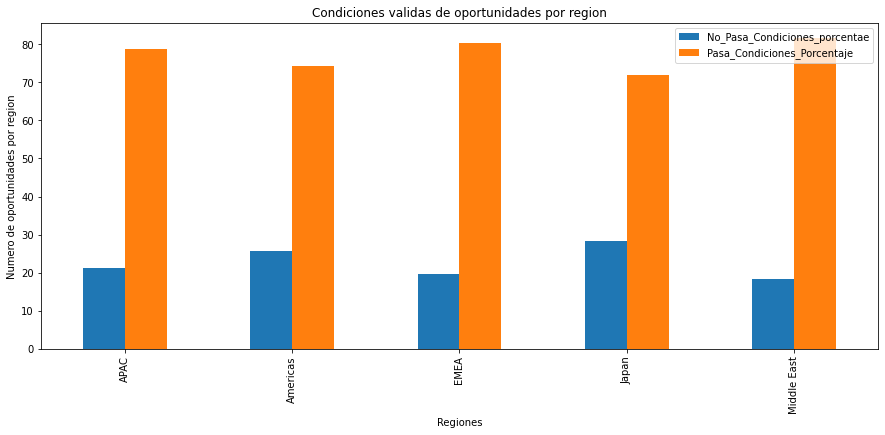

In [326]:
oportunidades_region_porcentaje.plot(kind = 'bar', title = 'Condiciones validas de oportunidades por region'\
    , linewidth = 2, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Numero de oportunidades por region')
ax.set_xlabel('Regiones')
plt.show()

0    16947
Name: Submitted_for_Approval, dtype: int64